```
     _                                     ____             _       _   ____                                    
    / \   _ __ ___   __ _ _______  _ __   / ___|  ___   ___(_) __ _| | |  _ \ _ __ ___   __ _ _ __ ___  ___ ___ 
   / _ \ | '_ ` _ \ / _` |_  / _ \| '_ \  \___ \ / _ \ / __| |/ _` | | | |_) | '__/ _ \ / _` | '__/ _ \/ __/ __|
  / ___ \| | | | | | (_| |/ / (_) | | | |  ___) | (_) | (__| | (_| | | |  __/| | | (_) | (_| | | |  __/\__ \__ \
 /_/   \_\_| |_| |_|\__,_/___\___/|_| |_| |____/ \___/ \___|_|\__,_|_| |_|   |_|  \___/ \__, |_|  \___||___/___/
                                                                                        |___/                   
```

### Module
__Stacked generalization__ Stacked generalization is a method for combining estimators to reduce their biases [W1992] [HTF]. 

### Goal
Investigating the relationship between independent variables or features and a dependent variable or outcome.

### Tools
1. Pandas
2. scikit-learn
3. GradientBoostingRegressor
4. ExtraTreesRegressor
5. StackingRegressor 

### Requirement
1. File Definition
2. Data Preparation
3. hotspot_spi.csv generated
 
### Data Source
__${WORKDIR}__/data/ouptut/hotspot_spi.csv

In [1]:
import os
import sys

supervised_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)
sys.path.append(supervised_dir)
sys.path

['/home/fausto/Development/workspace/amazon-social-progress/ml_models/supervised/regression',
 '/opt/anaconda3/lib/python39.zip',
 '/opt/anaconda3/lib/python3.9',
 '/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.9/site-packages',
 '/home/fausto/Development/workspace/amazon-social-progress/ml_models/supervised']

In [2]:
import pandas as pd
import numpy as np

import functions_regression as freg
from  load_dataset import LoadDataset, SpiType

from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import StackingRegressor

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

## Get the data

In [3]:
load_dataset = LoadDataset()
X, y = load_dataset.return_X_y_regr(spi_type = SpiType.INDICATORS)

columns_names = X.columns

X = scale(X)

In [4]:
print("X.shape:", X.shape, "y.shape:", y.shape)

X.shape: (2313, 49) y.shape: (2313,)


### Split dataset into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

print("X_train.shape:", X_train.shape, "y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape, "y_test.shape:", y_test.shape)

X_train.shape: (1619, 49) y_train.shape: (1619,)
X_test.shape: (694, 49) y_test.shape: (694,)


## Modeling

### Building, train and predict model

In [6]:
sgd_params = {
    "alpha": 0.01, 
    "loss": "squared_error", 
    "max_iter": 3000, 
    "penalty": "elasticnet", 
    "tol": 0.001
}
sgd_regressor = SGDRegressor(**sgd_params)

svm_params = {
    "C": 5, 
    "degree": 2, 
    "epsilon": 0.1, 
    "gamma": 'auto', 
    "tol": 0.01
}
svm_regressor = SVR(**svm_params)


tree_params = {
    "criterion": "squared_error", 
    "splitter": "best",
    "max_depth": 100, 
    "min_samples_leaf": 40, 
    "min_samples_split": 2, 
}
tree_regressor = DecisionTreeRegressor(**tree_params)

estimators = [
    ("sgd", sgd_regressor),    
    ('svm', svm_regressor),
    ('tree', tree_regressor)
]

gbr_params =  {
    "learning_rate": 0.1, 
    "max_depth": 4, 
    "min_samples_split": 3, 
    "n_estimators": 600
}
gbr = GradientBoostingRegressor(**gbr_params)
regressor = StackingRegressor(estimators=estimators, final_estimator=gbr)

regressor = regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

### Model Evaluation

In [7]:
freg.evaluate_model(regressor, X, y, X_train, y_train, X_test, y_test, y_pred)


Model-evaluation
----------------------------------------------------------------------
Score: 0.5169
CV train mean score:0.3394
K-fold CV average score: 0.34
R²: 0.4424
Max Error: 1470.7111
Explained Variance: 0.4430
MSE: 250809.2259
RMSE: 125404.6130
MAE: 393.4591


### Plor Prediction Result

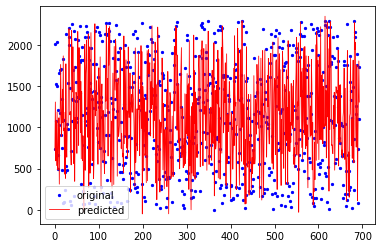

In [8]:
freg.plot_prediction_result(y_test, y_pred)